<a href="https://colab.research.google.com/github/pjcroxas/Remote-Sensing/blob/main/07_Satellite_Imagery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup Kaggle API
# !pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download kaggle dataset
!kaggle datasets download gauravduttakiit/satellite-imagery

satellite-imagery.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Unzip the data
! unzip satellite-imagery

In [ ]:
# Install necessary libraries
!pip install rioxarray
!pip install earthpy

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
from glob import glob
import os

In [ ]:
np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob("/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/*B?*.tiff")
S_sentinel_bands.sort()

In [ ]:
S_sentinel_bands

['/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/Satellite_Imagery_Analysis-main/Data/sundarbans_data/2020-01-27-00_00_2020-01-2

### Visualize Bands

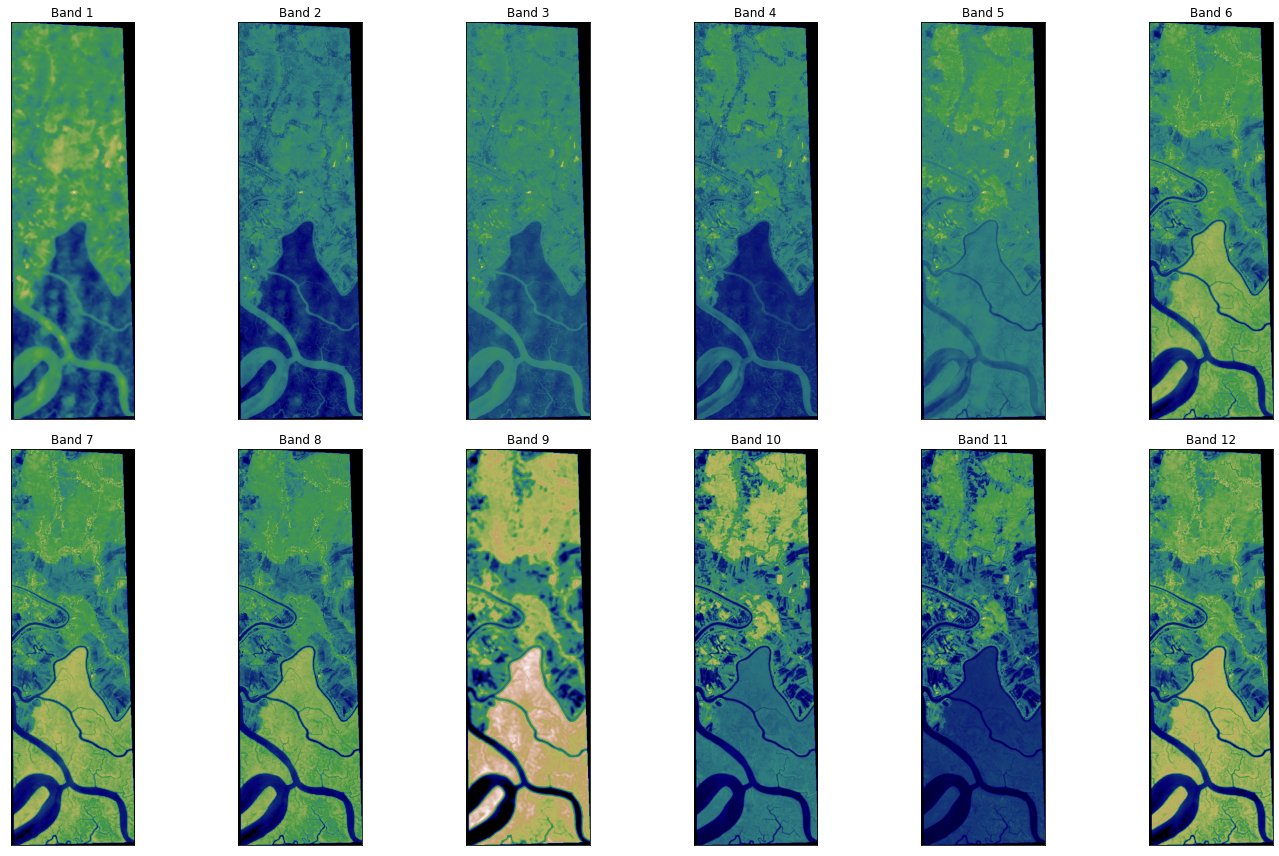

In [ ]:
l = []
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

### RGB Composite vs Stretch RGB

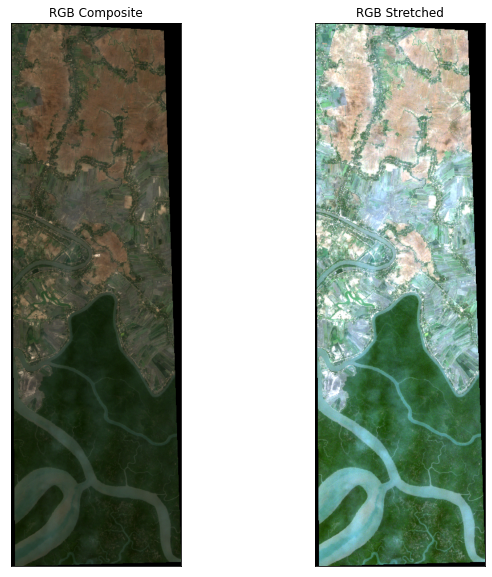

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,10))

ep.plot_rgb(arr_st,
            rgb=[3,2,1],
            figsize=(15,8),
            ax=ax[0],
            title="RGB Composite")

ep.plot_rgb(arr_st,
            rgb=[3,2,1],
            figsize=(15,8),
            stretch=True,
            ax=ax[1],
            title="RGB Stretched")
plt.show()

### Plot Histogram

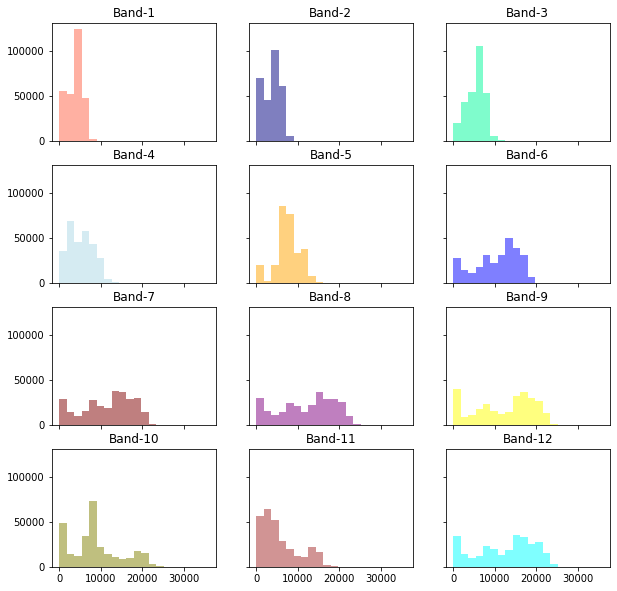

In [ ]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st,
        colors=colors,
        title=[f"Band-{i}" for i in range(1,13)],
        cols=3,
        alpha=0.5,
        figsize=(10,10))

plt.show()

### Normalized Difference Vegetation Index (NDVI)
<hr>

To determine the density of green on a patch of land, researchers must observe the distinct colors (wavelengths) of visible(VIS) and near-infrared (NIR)sunlight reflected by the plants. The Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared which vegetation strongly reflects and red light (which vegetation absorbs). NDVI always ranges from -1 to +1.

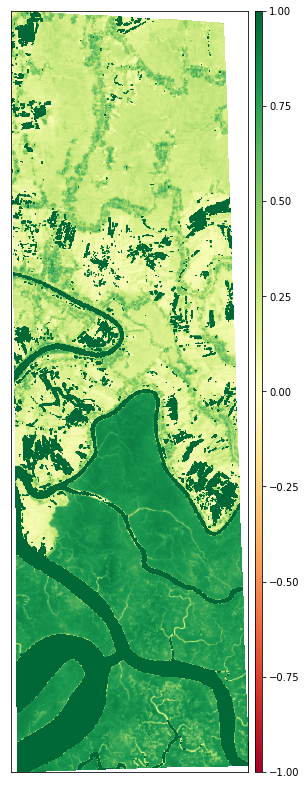

In [ ]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

ep.plot_bands(ndvi, cmap="RdYlGn", vmin=-1, vmax=1, figsize=(10,14))

plt.show()

### Soil Adjusted Vegetation index
<hr>

SAVI is used to correct Normalized Difference Vegetation Index (NDVI) for the influence of soil brightness in areas where vegetative cover is low. Landsat Surface Reflectance-derived SAVI is calculated as a ratio between the R and NIR values with a soil brightness correction factor (L) defined as 0.5 to accommodate most land cover types.

`((NIR - R) / (NIR + R + L)) * (1 + L)`

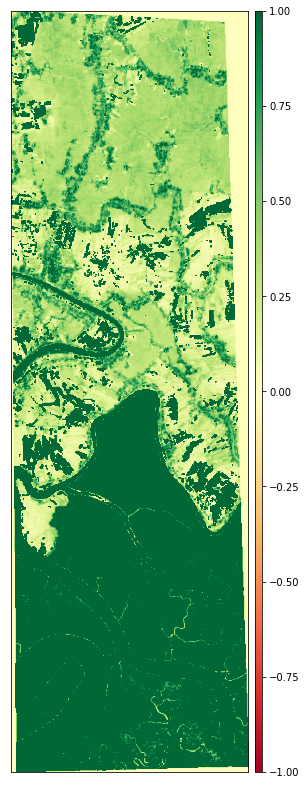

In [ ]:
L = 0.5 # Soil brightness correction factor

savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)

ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Visible Atmospheric Resistant Index (VARI)
<hr>

The Visible Atmospherically Resistant Index (VARI) is designed to emphasize vegetation in the visible portion of the spectrum while mitigating illumination differences and atmospheric effects. It is ideal for RGB or color images; it utilizes all three color bands.

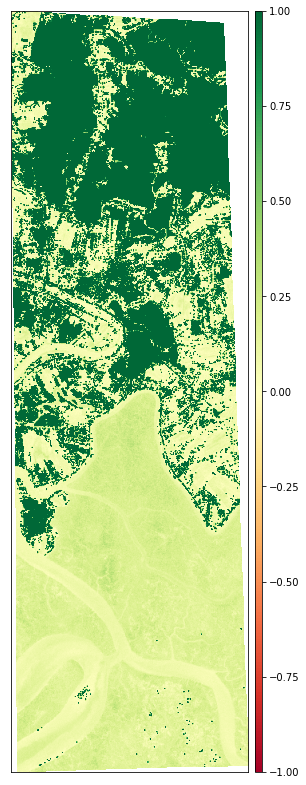

In [ ]:
vari = ((arr_st[2] - arr_st[3]) / (arr_st[2] + arr_st[3] + arr_st[3]))

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Water Indices
<hr>

Surface water change is a very important indicator of environmental, climatic, and anthropogenic activities. Remote sensors, such as sentinel-2, Landsat, have been providing data for the last four decades, which are useful for extracting land cover types such as forest and water. Researchers have proposed many surface water extraction techniques, among which index-based methods are popular owing to their simplicity and cost-effectiveness.

### Modified Normalized Difference Water Index (MNDWI)
<hr>

The Modified Normalized Difference Water Index (MNDWI) uses green and SWIR bands for the enhancement of open water features. It also diminishes built-up area features that are often correlated with open water in other indices.

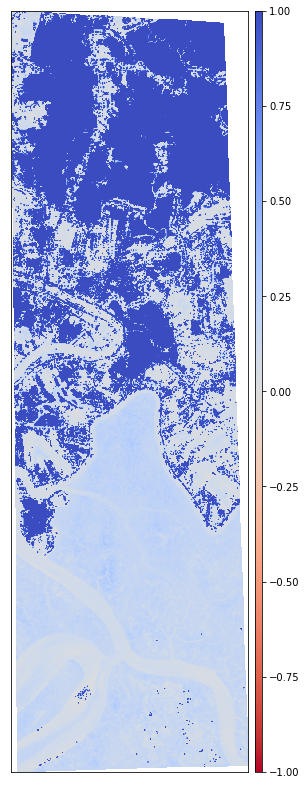

In [ ]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(vari, cmap="coolwarm_r", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Geology Indices
<hr>

Satellite imagery and aerial photography have proven to be important tools in support of mineral exploration projects. They can be used in a variety of ways. Firstly they provide geologists and field crews the location of tracks, roads, fences, and inhabited areas.

**Clay Minerals**

The clay ratio is a ratio of the SWIR1 and SWIR2 bands. This ratio leverages the fact that hydrous minerals such as clays, alunite absorb radiation in the 2.0–2.3 micron portion of the spectrum. This index mitigates illumination changes due to terrain since it is a ratio.

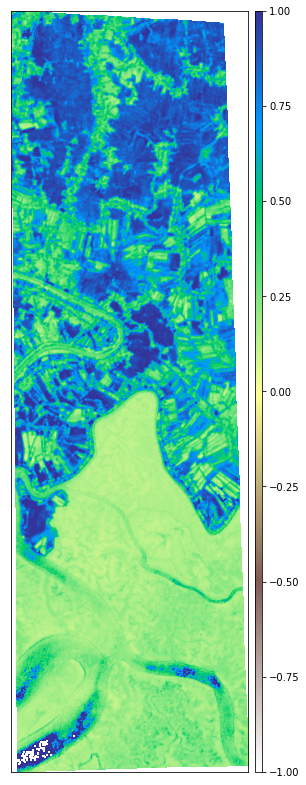

In [ ]:
cmi = np.divide(arr_st[10], arr_st[11])

ep.plot_bands(cmi, cmap="terrain_r", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()

### Ferrous Minerals
<hr>

The ferrous minerals ratio highlights iron-bearing materials. It uses the ratio between the SWIR band and the NIR band.

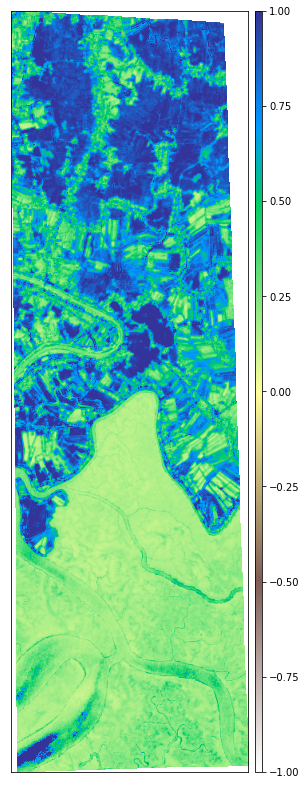

In [ ]:
fmi = np.divide(arr_st[10], arr_st[7])

ep.plot_bands(fmi, cmap="terrain_r", cols=1, vmin=-1, vmax=1, figsize=(10, 14))

plt.show()